In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import json
import datetime
import sys
import os.path as osp
DATA_DIR = '/Users/eun-yunhye/Developer/scrap/plotly-dash/data'


In [23]:
df_count = pd.read_csv(osp.join(DATA_DIR, 'TP_ADSTRD_ACCTO_CARD_USE_FQ.csv'), encoding='utf-8')
df_amount = pd.read_csv(osp.join(DATA_DIR, 'TP_LCRCY_SETLE_AMOUNT_CHNGE.csv'), encoding='utf-8')

In [58]:
city = '부천시'
dong = '상동'
sample_amount = df_amount.loc[(df_amount['시군구명'] == city) & (df_amount['행정동명'] == dong)]['결제금액'].values[1:]
sample_count = df_count.loc[(df_count['시군구명'] == city) & (df_count['동명'] == dong)]['사용빈도'].values
data_column = sorted(list(set(df_count['년월'].values)))[1:]

# sample_count += [0,0]
# selected = df_count.groupby(['시군구명','동명']).sum().reset_index()
# region_count = selected.loc[(selected['시군구명'] == city) & (selected['동명'] == dong)]['사용빈도'].values[-1]
# selected = df_amount.loc[(df_amount['시군구명'] == city) & (df_amount['행정동명'] == dong)]
# region_amount = selected['결제금액'].values[-1]
# region_ratio = selected['결제변화비율'].values[-1]
data_column

['2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09']

In [2]:
df = pd.read_csv('../data/지역화폐 가맹점 현황.csv', encoding='euc-kr')
display(df)

,시군명,상호명,업종명(종목명),소재지도로명주소,소재지지번주소,우편번호,위도,경도,데이터기준일자
0,과천시,성경식품,음료식품-기타음료식품,경기 과천시 상하벌로 50(과천동),경기도 과천시 과천동 271-1번지,13815.0,37.446065,127.002148,2021-03-19
1,과천시,성림농원,문화.취미-화원,경기 과천시 물사랑로 241남서울화훼 B-11호(주암동),경기도 과천시 주암동 142번지 남서울화훼 B-11호,13820.0,37.458814,127.029404,2021-03-19
2,과천시,성모 미용실,보건위생-미용원,"경기 과천시 별양로 12,B동 1102호 (원문동,래미안슈르)",경기도 과천시 원문동 4번지 래미안슈르 B동 1102호,13835.0,37.423062,126.993518,2021-03-19
3,과천시,성창종합철물,건축자재-목재?석재?철물,경기 과천시 꿈보람길 34연아유치원상가 101호(별양동),경기도 과천시 별양동 4번지 연아유치원상가 101호,13836.0,37.431465,126.996355,2021-03-19
4,과천시,세레니끄과천점,보건위생-화장품,경기 과천시 별양로 28D상가 2001호 (원문동),NaN,NaN,NaN,NaN,2021-03-19
...,...,...,...,...,...,...,...,...,...
521733,화성시,발안냉동설비,수리서비스-기타수리서비스,경기 화성시 향남읍 배터길 40,경기도 화성시 향남읍 장짐리 296-4번지,18594.0,37.134663,126.904634,2021-03-19
521734,화성시,제이원(J1)중화,일반휴게음식-중국식,경기 화성시 지산2길 20-12일부호 101호 (영천동),경기도 화성시 영천동 710-6번지 일부호 101호,18473.0,37.204922,127.114591,2021-03-19
521735,화성시,덩실덩실,일반휴게음식-서양음식,"경기 화성시 향남읍 평6길 491층 103,104호 라벤다테라스","경기도 화성시 향남읍 평리 122-1번지 1층 103,104호 라벤다테라스",18593.0,37.130568,126.907650,2021-03-19
521736,화성시,훠밍당 마라탕,일반휴게음식-중국식,경기 화성시 떡전골로 60106동 107호 (병점동),경기도 화성시 병점동 871번지 병점역효성해링턴플레이스 106동 107호,18412.0,37.205355,127.036572,2021-03-19


In [3]:
len(df)

521738

In [4]:
df = df.loc[(df['위도'].notnull()) & (df['우편번호'].notnull()), :].drop('데이터기준일자', axis=1)

In [5]:
df[['시군명', '상호명', '업종명(종목명)', '소재지도로명주소', '소재지지번주소']] = df[['시군명', '상호명', '업종명(종목명)', '소재지도로명주소', '소재지지번주소']].astype(str)
df['우편번호'] = df['우편번호'].astype(int)

In [6]:
df_postnum = pd.read_table('../data/경기도.txt', delimiter='|', encoding='utf-8')
df_postnum = df_postnum.loc[:, ['우편번호', '시군구', '읍면', '법정동명', '리명', '행정동명']].drop_duplicates('우편번호', keep='first')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (5,6,18) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
df = df.loc[df['우편번호'].isin(list(set(df_postnum['우편번호'].values)))]

In [8]:
df['행정동'] = df['우편번호'].apply(lambda x: df_postnum.loc[df_postnum['우편번호'] == x, '행정동명'].values[0])

In [9]:
df = df.reset_index().drop('index', axis=1)
null_idx = df.loc[df['행정동'].isnull()].index

In [10]:
suffixs = ('읍', '면', '동')
def f(address):
    tokens = address.split(' ')
    for token in tokens:
        if token.endswith('읍') or token.endswith(suffixs):
            return token
    return None

df.iloc[null_idx, 8] = df.iloc[null_idx, 4].apply(lambda x: f(x))

In [11]:
df.isnull().sum()

시군명         0
상호명         0
업종명(종목명)    0
소재지도로명주소    0
소재지지번주소     0
우편번호        0
위도          0
경도          0
행정동         3
dtype: int64

In [12]:
df_center_point = pd.read_csv('../data/행정_법정동 중심좌표.csv', encoding='utf-8')
df_center_point = df_center_point.drop_duplicates(['시군구', '읍면동'], keep='first')

In [13]:
set(df['행정동'].values) - set(df_center_point['읍면동'].values)

{None,
 '광남1동',
 '광남2동',
 '남사읍',
 '동백1동',
 '동백2동',
 '동백3동',
 '동탄7동',
 '동탄8동',
 '사1동',
 '송산3동',
 '영덕1동',
 '영덕2동',
 '퇴계원읍'}

In [14]:
change_dict = {
    '광남1동': '광남동',
    '광남2동': '광남동',
    '남사읍': '남사면',
    '동백1동': '동백동',
    '동백2동': '동백동',
    '동백3동': '동백동',
    '사1동': '사동',
    '송산3동': '송산동',
    '영덕1동': '영덕동',
    '영덕2동': '영덕동',
    '퇴계원읍': '퇴계원면'
}

In [15]:
df = df.replace({'행정동': change_dict})

In [16]:
df = df.loc[df['행정동'].isin(list(set(df_center_point['읍면동'].values)))]

In [17]:
df.loc[(df['시군명'] == '가평군') & (df['행정동'] == '가평읍')]

,시군명,상호명,업종명(종목명),소재지도로명주소,소재지지번주소,우편번호,위도,경도,행정동
7813,가평군,주식회사 세미리조트귀족,숙박업-여관/기타숙박업,경기 가평군 가평읍 복장포길 46-148,경기도 가평군 가평읍 복장리 212-4번지,12430,37.744253,127.503201,가평읍
7820,가평군,가평OA,사무통신-사무용 OA기기,경기 가평군 가평읍대곡리 258-23번지,경기도 가평군 가평읍 대곡리 258-23번지,12416,37.826264,127.511454,가평읍
7821,가평군,가평OA/특별할부,사무통신-사무용 OA기기,경기 가평군 가평읍대곡리 258-23번지,경기도 가평군 가평읍 대곡리 258-23번지,12416,37.826264,127.511454,가평읍
7824,가평군,핸드폰 마켓,사무통신-통신기기,경기 가평군 가평읍 석봉로 167외 2필지,경기도 가평군 가평읍 읍내리 494-10번지 외 2필지,12417,37.830194,127.510523,가평읍
7826,가평군,민텔레콤,사무통신-통신기기,경기 가평군 가평읍 굴다리길 1,경기도 가평군 가평읍 대곡리 232-5번지,12420,37.826065,127.515170,가평읍
...,...,...,...,...,...,...,...,...,...
87958,가평군,제일미용실,보건위생-미용원,경기 가평군 가평읍 오리나무길 13,경기도 가평군 가평읍 대곡리 234-6번지,12420,37.826408,127.514386,가평읍
88803,가평군,희찬이네청과,음료식품-농?축?수산품,"경기 가평군 가평읍 석봉로153번길 13,101동 408호 (태광아파트)",경기도 가평군 가평읍 대곡리 285-6번지 태광아파트 101동 408호,12417,37.828409,127.509738,가평읍
89882,가평군,봉화전,일반휴게음식-일반한식,경기 가평군 가평읍 경춘로 1795,경기도 가평군 가평읍 상색리 254-4번지,12426,37.799386,127.482382,가평읍
90064,가평군,마리오,일반휴게음식-일반한식,경기 가평군 가평읍 상지로 693,경기도 가평군 가평읍 산유리 728번지,12429,37.751230,127.495425,가평읍


In [18]:
suffixs2 = ('군', '시')
def f2(address):
    tokens = address.split(' ')
    for i, token in enumerate(tokens):
        if i == 0:
            continue
        if token.endswith('구') and tokens[i-1].endswith(suffixs2) and not tokens[i-1].endswith('신도시'):
            return ' '.join([tokens[i-1], token])
    return None

df.loc[df['시군명'].isin(['고양시', '성남시', '수원시', '안산시', '안양시', '용인시']), '시군명'] = df.loc[df['시군명'].isin(['고양시', '성남시', '수원시', '안산시', '안양시', '용인시']), '소재지지번주소'].apply(f2)

In [19]:
df = df.loc[df['시군명'].notnull()]

In [20]:
categories = list(set(df['업종명(종목명)'].values))
categories = list(set(map(lambda x: x.split('-')[0].strip() if len(x.split('-')) > 1 else '', categories)))
categories = categories[1:]
categories.sort()

In [21]:
categories_dict = {}
for e in list(set(df['업종명(종목명)'].values)):
    if e in categories_dict:
        continue
    else:
        categories_dict[e] = None
        for key in categories:
            if key in e:
                categories_dict[e] = key
                break

In [22]:
df['category'] = df['업종명(종목명)'].apply(lambda x: categories_dict[x])
df = df.loc[df['category'].notnull(), :]

In [24]:
big_category_dict = {
    '쇼핑': ['가구', '건강식품', '전기제품', '주방용구', '광학제품', '의류', '직물', '서적문구', '소매업', '신변잡화', '사무통신', '건축자재'],
    '취미 레저': ['레저업소', '레저용품', '문화.취미'],
    '농업': ['농업'],
    '기타': ['기타'],
    '의료': ['병원', '보건위생', '보험', '약국', '의원'],
    '편의점': ['유통업 비영리', '유통업 영리'],
    '음식': ['음료식품', '음식점업', '일반휴게음식'],
    '자동차' : ['자동차정비 유지', '자동차판매', '연료판매점'],
    '교육비': ['학원']
}
def func(category):
    for key, value in big_category_dict.items():
        for e in value:
            if e == category:
                return key
    return None
df['big_category'] = df['category'].apply(lambda x: func(x))

In [25]:
df = df.loc[df['big_category'].notnull(), :]
display(df)

,시군명,상호명,업종명(종목명),소재지도로명주소,소재지지번주소,우편번호,위도,경도,행정동,category,big_category
0,과천시,성경식품,음료식품-기타음료식품,경기 과천시 상하벌로 50(과천동),경기도 과천시 과천동 271-1번지,13815,37.446065,127.002148,과천동,기타,기타
1,과천시,성림농원,문화.취미-화원,경기 과천시 물사랑로 241남서울화훼 B-11호(주암동),경기도 과천시 주암동 142번지 남서울화훼 B-11호,13820,37.458814,127.029404,과천동,문화.취미,취미 레저
2,과천시,성모 미용실,보건위생-미용원,"경기 과천시 별양로 12,B동 1102호 (원문동,래미안슈르)",경기도 과천시 원문동 4번지 래미안슈르 B동 1102호,13835,37.423062,126.993518,원문동,보건위생,의료
3,과천시,성창종합철물,건축자재-목재?석재?철물,경기 과천시 꿈보람길 34연아유치원상가 101호(별양동),경기도 과천시 별양동 4번지 연아유치원상가 101호,13836,37.431465,126.996355,별양동,건축자재,쇼핑
4,과천시,세자매농원,문화.취미-화원,경기 과천시 물사랑로 241과천화훼집하장내(주암동),경기도 과천시 주암동 142번지 과천화훼집하장내,13820,37.458814,127.029404,과천동,문화.취미,취미 레저
...,...,...,...,...,...,...,...,...,...,...,...
491322,화성시,발안냉동설비,수리서비스-기타수리서비스,경기 화성시 향남읍 배터길 40,경기도 화성시 향남읍 장짐리 296-4번지,18594,37.134663,126.904634,향남읍,기타,기타
491323,화성시,제이원(J1)중화,일반휴게음식-중국식,경기 화성시 지산2길 20-12일부호 101호 (영천동),경기도 화성시 영천동 710-6번지 일부호 101호,18473,37.204922,127.114591,동탄5동,일반휴게음식,음식
491324,화성시,덩실덩실,일반휴게음식-서양음식,"경기 화성시 향남읍 평6길 491층 103,104호 라벤다테라스","경기도 화성시 향남읍 평리 122-1번지 1층 103,104호 라벤다테라스",18593,37.130568,126.907650,향남읍,일반휴게음식,음식
491325,화성시,훠밍당 마라탕,일반휴게음식-중국식,경기 화성시 떡전골로 60106동 107호 (병점동),경기도 화성시 병점동 871번지 병점역효성해링턴플레이스 106동 107호,18412,37.205355,127.036572,병점1동,일반휴게음식,음식


In [26]:
df.loc[(df['시군명'] == '광명시') & (df['행정동'] == '광명1동')].groupby('big_category').count().reset_index()

,big_category,시군명,상호명,업종명(종목명),소재지도로명주소,소재지지번주소,우편번호,위도,경도,행정동,category
0,교육비,6,6,6,6,6,6,6,6,6,6
1,기타,36,36,36,36,36,36,36,36,36,36
2,쇼핑,35,35,35,35,35,35,35,35,35,35
3,음식,29,29,29,29,29,29,29,29,29,29
4,의료,21,21,21,21,21,21,21,21,21,21
5,자동차,3,3,3,3,3,3,3,3,3,3
6,취미 레저,6,6,6,6,6,6,6,6,6,6
7,편의점,3,3,3,3,3,3,3,3,3,3


In [27]:
df.groupby('big_category').count()

,시군명,상호명,업종명(종목명),소재지도로명주소,소재지지번주소,우편번호,위도,경도,행정동,category
big_category,,,,,,,,,,
교육비,34738,34738,34738,34738,34738,34738,34738,34738,34738,34738
기타,74948,74948,74948,74948,74948,74948,74948,74948,74948,74948
농업,901,901,901,901,901,901,901,901,901,901
쇼핑,71787,71787,71787,71787,71787,71787,71787,71787,71787,71787
음식,149394,149394,149394,149394,149394,149394,149394,149394,149394,149394
의료,59258,59258,59258,59258,59258,59258,59258,59258,59258,59258
자동차,20269,20269,20269,20269,20269,20269,20269,20269,20269,20269
취미 레저,26195,26195,26195,26195,26195,26195,26195,26195,26195,26195
편의점,17353,17353,17353,17353,17353,17353,17353,17353,17353,17353


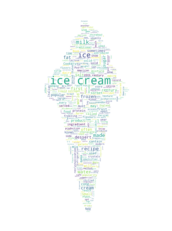

In [28]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from newspaper import Article
from PIL import Image

article = Article('https://en.wikipedia.org/wiki/Ice_cream')
article.download()
article.parse()
# mask=np.array(Image.open('../image/twitter.png'))
mask=np.array(Image.open('../image/icecream.png'))
mask_colors = ImageColorGenerator(mask)
wc = WordCloud(
    stopwords=STOPWORDS,
    mask=mask,
    background_color='white',
    max_words=2000,
    random_state=42,
    width=mask.shape[1],
    height=mask.shape[0],
    # color_func=mask_colors
)
wc.generate(article.text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()